# Ted Talks and Climate Change

## Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re

## Data

In [16]:
ted_talks = pd.read_csv("ted-talks.csv")
ted_talks

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...


## Explore

In [17]:
ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [18]:
ted_talks.describe()

,views,likes
count,5.440000e+03,5.440000e+03
mean,2.061576e+06,6.260762e+04
std,3.567098e+06,1.076468e+05
min,5.320000e+02,1.500000e+01
25%,6.707500e+05,2.000000e+04
50%,1.300000e+06,4.050000e+04
75%,2.100000e+06,6.500000e+04
max,7.200000e+07,2.100000e+06


## Missing values

In [19]:
ted_talks.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [20]:
missingno.matrix(ted_talks)

NameError: name 'missingno' is not defined

In [ ]:
ted_talks[ted_talks.isna().any(axis=1)]

,title,author,date,views,likes,link
3039,Year In Ideas 2015,NaN,December 2015,532,15,https://ted.com/talks/year_in_ideas_2015


## Preprocessing

### Format date

In [ ]:
ted_talks.date.head()

0     December 2021
1     February 2022
2    September 2021
3      October 2021
4      October 2021
Name: date, dtype: object

In [ ]:
ted_talks.date = pd.to_datetime(ted_talks.date)
ted_talks.date.head()

0   2021-12-01
1   2022-02-01
2   2021-09-01
3   2021-10-01
4   2021-10-01
Name: date, dtype: datetime64[ns]

## Search for climate change pattern

In [ ]:
filt = ted_talks.title.str.contains(r"[Cc]limate") | ted_talks.title.str.contains(r".nvironment...")
ted_talks_climate = ted_talks[filt]
ted_talks_climate

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
17,The ocean's ingenious climate solutions,Susan Ruffo,2021-10-01,522000,15000,https://ted.com/talks/susan_ruffo_the_ocean_s_...
18,How we're reducing the climate impact of elect...,Tim Dunn,2022-02-01,96000,2900,https://ted.com/talks/tim_dunn_how_we_re_reduc...
34,How to boost nature-based solutions to climate...,Zac Goldsmith,2021-10-01,30000,913,https://ted.com/talks/zac_goldsmith_how_to_boo...
...,...,...,...,...,...,...
4956,4 environmental 'heresies',Stewart Brand,2009-06-01,832000,24000,https://ted.com/talks/stewart_brand_4_environm...
5226,New thinking on the climate crisis,Al Gore,2008-03-01,2200000,68000,https://ted.com/talks/al_gore_new_thinking_on_...
5280,A critical look at geoengineering against clim...,David Keith,2007-09-01,1400000,44000,https://ted.com/talks/david_keith_a_critical_l...
5389,Global priorities bigger than climate change,Bjorn Lomborg,2005-02-01,1700000,53000,https://ted.com/talks/bjorn_lomborg_global_pri...


In [ ]:
ted_talks_no_climate = ted_talks.loc[~filt]
ted_talks_no_climate

,title,author,date,views,likes,link
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
5,The tragedy of air pollution — and an urgent d...,Rosamund Adoo-Kissi-Debrah,2021-10-01,422000,12000,https://ted.com/talks/rosamund_adoo_kissi_debr...
6,The myth of Narcissus and Echo,Iseult Gillespie,2022-02-01,412000,12000,https://ted.com/talks/iseult_gillespie_the_myt...
...,...,...,...,...,...,...
5434,Behind the design of Seattle's library,Joshua Prince-Ramus,2006-02-01,1200000,37000,https://ted.com/talks/joshua_prince_ramus_behi...
5435,The best stats you've ever seen,Hans Rosling,2006-02-01,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,2006-02-01,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,2006-02-01,2900000,88000,https://ted.com/talks/majora_carter_greening_t...


In [ ]:
year_count_climate = ted_talks_climate.title.groupby(ted_talks_climate.date.dt.year).agg("count")
year_count_climate

date
2005     1
2006     1
2007     1
2008     1
2009     2
2010     2
2012     2
2013     2
2014     2
2015     3
2016     4
2017     4
2018     4
2019    16
2020    23
2021    27
2022     1
Name: title, dtype: int64

In [ ]:
year_count_no_climate = ted_talks_no_climate.title.groupby(ted_talks_no_climate.date.dt.year).count()
year_count_no_climate

date
1970      2
1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     26
2003     34
2004     33
2005     64
2006     48
2007    112
2008     83
2009    231
2010    265
2011    271
2012    300
2013    386
2014    355
2015    374
2016    395
2017    491
2018    469
2019    528
2020    478
2021    363
2022     19
Name: title, dtype: int64

## Change figure size

The bar chart shows us that there has been a stark increase in climate change and environmental issues related TED talks over the last three years.

In [ ]:
plt.rcParams['figure.figsize'] = (12, 7)

<AxesSubplot:xlabel='date'>

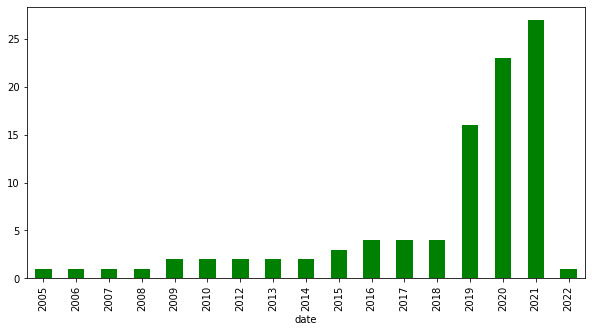

In [ ]:
plt.figure(figsize=(10,5))
year_count_climate.plot(kind = "bar", color="green")

Create a counts table with climate topics and rest topics.

In [ ]:
counts_table = pd.concat([year_count_climate, year_count_no_climate], axis=1, names=["climate", "non_climate"])
counts_table.sort_index(inplace=True)
counts_table.columns = ["climate", "no_climate"]
counts_table = counts_table.loc[2000:2022]
counts_table

,climate,no_climate
date,,
2001,NaN,5
2002,NaN,26
2003,NaN,34
2004,NaN,33
2005,1.0,64
2006,1.0,48
2007,1.0,112
2008,1.0,83
2009,2.0,231


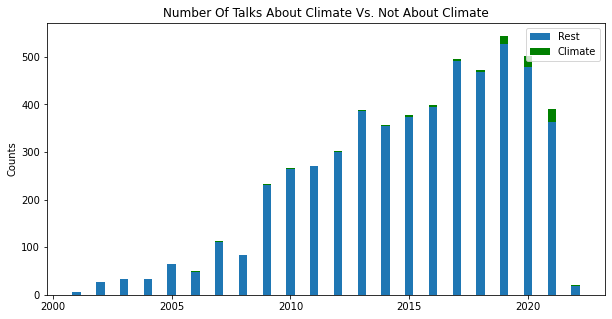

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(10,5))
plt.bar(counts_table.index, counts_table.no_climate, width, label='Rest')
plt.bar(counts_table.index, counts_table.climate, width, bottom=counts_table.no_climate ,label='Climate', color="green")

plt.ylabel('Counts')
plt.title('Number Of Talks About Climate Vs. Not About Climate')
plt.legend()

## How did median views and likes for climate related talks change over time?

Climate related talks get more views periodically.

<AxesSubplot:xlabel='date'>

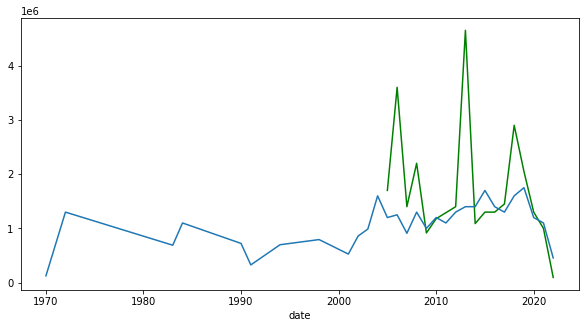

In [ ]:
plt.figure(figsize=(10,5))
ted_talks_climate["views"].groupby(ted_talks_climate.date.dt.year).median().plot(color="green")
ted_talks_no_climate["views"].groupby(ted_talks_no_climate.date.dt.year).median().plot()

The same with means instead of medians. There seem to be more extreme data points for

<AxesSubplot:xlabel='date'>

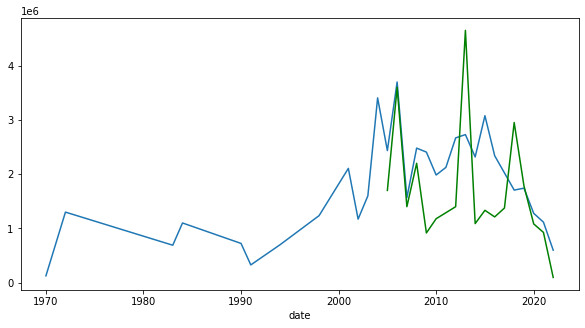

In [ ]:
plt.figure(figsize=(10,5))
ted_talks_no_climate["views"].groupby(ted_talks_no_climate.date.dt.year).mean().plot()
ted_talks_climate["views"].groupby(ted_talks_climate.date.dt.year).mean().plot(color="green")

The peak year for climate talks was 2013, followed by 2006 and 2018.

In [ ]:
ted_talks_climate.groupby(ted_talks_climate.date.dt.year).median().sort_values(["views"], ascending=False)

,views,likes
date,,
2013,4650000.0,140500.0
2006,3600000.0,109000.0
2018,2900000.0,87500.0
2008,2200000.0,68000.0
2019,2050000.0,62000.0
2005,1700000.0,53000.0
2017,1450000.0,43500.0
2007,1400000.0,44000.0
2012,1400000.0,42000.0


Text(0.5, 1.0, 'Median Views and Likes for Climate Talks')

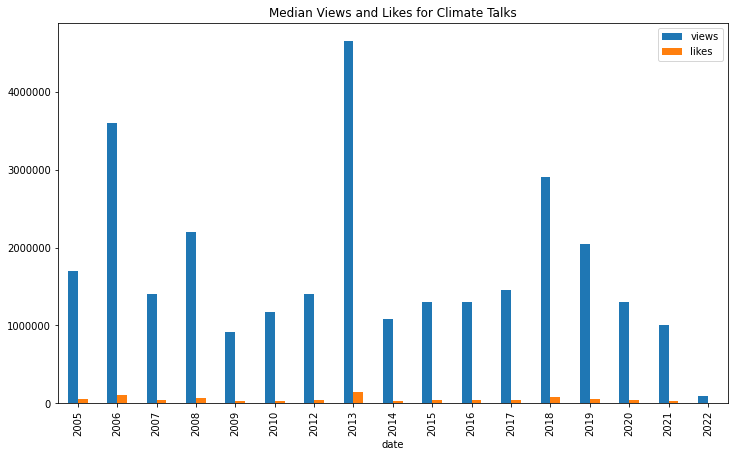

In [ ]:
ted_talks_climate.groupby(ted_talks_climate.date.dt.year).median().plot(kind = "bar")
plt.gca().ticklabel_format(axis='y', style='plain')
plt.title("Median Views and Likes for Climate Talks")


## Let's now plot the views difference of climate talks and rest talks

In [ ]:
ted_talks_climate.groupby(ted_talks_climate.date.dt.year).median()
ted_talks_no_climate.groupby(ted_talks_no_climate.date.dt.year).median()

count_table_metrics = pd.concat([
    ted_talks_climate["views"].groupby(ted_talks_climate.date.dt.year).median(), 
    ted_talks_climate["likes"].groupby(ted_talks_climate.date.dt.year).median(), 
    ted_talks_no_climate["views"].groupby(ted_talks_no_climate.date.dt.year).median(),
    ted_talks_no_climate["likes"].groupby(ted_talks_no_climate.date.dt.year).median()
    ],
    axis=1,
    keys=[
        "climate_views",
        "climate_likes",
        "rest_views",
        "rest_likes"
    ])
count_table_metrics.sort_index(inplace=True)
count_table_metrics

NameError: name 'ted_talks_climate' is not defined

In [ ]:
count_table_metrics[["climate_views", "rest_views"]].loc[2004:2022]

,climate_views,rest_views
date,,
2004,NaN,1600000.0
2005,1700000.0,1200000.0
2006,3600000.0,1250000.0
2007,1400000.0,910000.0
2008,2200000.0,1300000.0
2009,916000.0,1000000.0
2010,1178500.0,1200000.0
2011,NaN,1100000.0
2012,1400000.0,1300000.0


In [ ]:
count_table_metrics[["climate_views", "rest_views"]].loc[2004:2022].plot(kind="bar", color = ["darkgreen", "black"])
plt.gca().ticklabel_format(axis='y', style='plain')
plt.title("Average (Median) View Count Of Ted Talks About Climate And Talks Without")

NameError: name 'count_table_metrics' is not defined